# Relación tipos y tokens dentro de corpus¶

Generalmente, el tamaño de los corpus se mide en número de tokens, pero lo que buscamos respresentar (al menos en muchas tareas de PLN) son los tipos.

En cada lengua, el número de tipos es (hasta cierto punto) limitado. Si bien se introducen palabras nuevas constantemente. Existe un conjunto finito de tipos que cada persona conoce y que se utilizan dentro de un corpus. Este conjunto de tipos puede variar según el tema del corpus. Pero en general, puede abarcarse la mayor parte de los tipos usados en una lengua con un corpus finito.

In [2]:
#Paquetería
import nltk
from nltk.corpus import brown, cess_esp
from collections import defaultdict
import matplotlib.pyplot as plt

#Descarga del corpus Brown para inglés
nltk.download('brown')
#Descarga del corpus CESS Treebank para español
nltk.download('cess_esp')

[nltk_data] Downloading package brown to
[nltk_data]     /home/penserbjorne/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     /home/penserbjorne/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

Para ver el comportamiento de los tipos con respecto a los tokens, ocuparemos dos corpus:

- El corpus CESS Trebank para español con alrededor de 200 000 tokens
- El corpus Brown para inglés con alrededor de 1 200 000 tokens

In [3]:
#Corpus inglés
eng = brown.sents()
#Corpus español
esp = cess_esp.sents()

Por cada oración en el corpus tomaremos el número de tokens e iremos incrementando este número por cada oración. Asimismo, veremos cuántos tipos nuevos se agregan y cómo aumentar el número de tokens (tamaño del corpus) hace aparecer nuevos tipos.

In [4]:
def TT_curve(corpus):
    #Tipos
    words = set([])
    types = []
    
    #Tokens
    dif_words = 0
    tokens = []

    for sent in corpus:
        #Agrega núm de tokens
        dif_words += len(sent)
        tokens.append( dif_words )
        
        #Agrega tipos (palabras nuevas)
        words |= (set([s.lower() for s in sent]))
        types.append( len(words) )

    return (types, tokens)

## Corpus español

Dado que el español es un corpus muy pequeño (alrededor de 200 000 tokens) parecería que entre más tipos aumenta casi linealmente con el número de tipos.

In [5]:
types_esp, tokens_esp = TT_curve(esp)

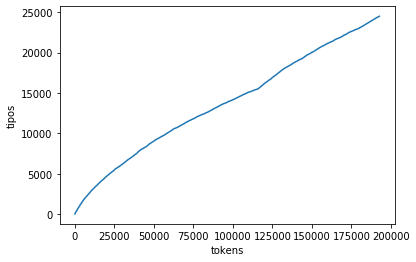

In [6]:
plt.plot(tokens_esp, types_esp)
plt.xlabel('tokens')
plt.ylabel('tipos')
plt.show()

## Corpus inglés

En un corpus más grande, como el de inglés, se puede notar que el número de tipos comienza a estabilizarse aunque el número de tokens crezca. En este caso, comenzamos a ver que, aunque se agreguen más tokens a un corpus, el número de tipos crecerá muy poco o no crecerá.

In [7]:
types_eng, tokens_eng = TT_curve(eng)

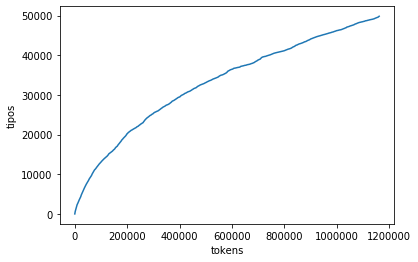

In [8]:
plt.plot(tokens_eng, types_eng)
plt.xlabel('tokens')
plt.ylabel('tipos')
plt.show()